In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
# 기존 경로 변경
os.chdir('/content/drive/MyDrive/dataset')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.data import Dataset
from tensorflow.keras import layers
df = pd.read_csv('./data/solar_weather.csv')
df

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.00,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196771,2022-08-31 16:45:00,118,23.7,18.6,1023,57,3.8,0.0,0.0,52,1,780,825,0.95,3,16,8
196772,2022-08-31 17:00:00,82,15.6,18.5,1023,61,4.2,0.0,0.0,60,1,795,825,0.96,3,17,8
196773,2022-08-31 17:15:00,51,8.0,18.5,1023,61,4.2,0.0,0.0,60,1,810,825,0.98,3,17,8
196774,2022-08-31 17:30:00,24,2.1,18.5,1023,61,4.2,0.0,0.0,60,1,825,825,1.00,3,17,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

In [6]:
df_train = df[df['Time'].astype('datetime64[ns]').dt.year != 2022].drop('Time',axis=1)
df_test = df[df['Time'].astype('datetime64[ns]').dt.year == 2022].drop('Time',axis=1)
df_train

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174043,0,0.0,10.5,1012,96,5.5,0.0,0.0,100,0,0,450,0.0,4,22,12
174044,0,0.0,9.6,1013,96,5.2,0.0,0.0,100,0,0,450,0.0,4,23,12
174045,0,0.0,9.6,1013,96,5.2,0.0,0.0,100,0,0,450,0.0,4,23,12
174046,0,0.0,9.6,1013,96,5.2,0.0,0.0,100,0,0,450,0.0,4,23,12


(500, 30, 15)
tf.Tensor(
[-0.49635823 -0.77059858  0.10266062  1.21805269  1.15097497 -0.23953377
 -0.10774323  0.86169571  0.97326137 -0.48724771 -1.48620979 -0.2801326
  0.61118692 -0.50562058 -1.6072947 ], shape=(15,), dtype=float64)
tf.Tensor(44, shape=(), dtype=int64)


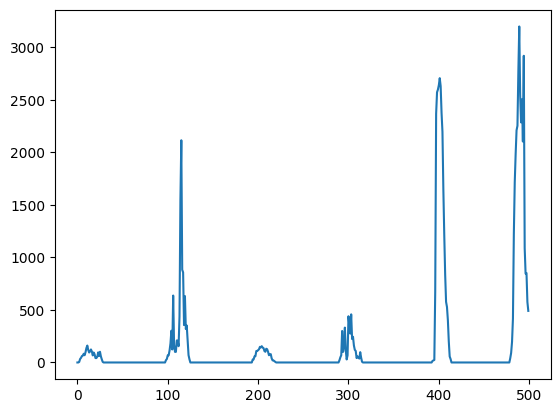

In [10]:
from sklearn.preprocessing import StandardScaler

def set_seq(seq, seq_len, batch_size):
    X = scaler.transform(seq.iloc[:, 1:])
    y = seq.iloc[seq_len:,0].to_numpy()
    dataset = tf.keras.utils.timeseries_dataset_from_array(X, y,
                                                           sequence_length=seq_len,   # 10개의 타임스텝
                                                           sampling_rate=1,      # 타임스텝 간격
                                                           sequence_stride=1,    # 각 시퀀스별 간격
                                                           batch_size=batch_size,
                                                           shuffle=False )
    return dataset

batch_size = 500
seq_len = 30

scaler = StandardScaler()
scaler.fit(df_train.iloc[:,1:])

train_ds = set_seq(df_train, seq_len, batch_size)
test_ds = set_seq(df_test, seq_len, batch_size)
# train_ds.shuffle(len(train_ds)*batch_size)

for feature, label in train_ds.take(1):
    print(feature.shape)
    print(feature[4,29,:])
    # print(df_train.iloc[:30,:])
    print(label[4])
    plt.plot(range(500), label)

In [11]:
def lstm_model(input_size):
    
    lstm1 = layers.LSTM(units = 64, return_sequences = True)
    lstm2 = layers.LSTM(128, return_sequences = True)
    lstm3 = layers.LSTM(64, return_sequences = False)
    
    dr = layers.Dropout(0.3)
    dense1 = layers.Dense(32)
    dense2 = layers.Dense(1)

    
    inp = tf.keras.Input(input_size)
    x = lstm1(inp)
    # x = layers.BatchNormalization()(x)
    x = lstm2(x)
    # x = layers.BatchNormalization()(x)
    x = lstm3(x)
    # x = layers.BatchNormalization()(x)
    x = dr(x)
    x = dense1(x)
    out = dense2(x)
    return tf.keras.Model(inp, out, name = 'lstm_model')

In [12]:
model = lstm_model((30,15))
model.summary()
# 컴파일
opt = tf.keras.optimizers.Adam(learning_rate=0.0001) # 아담 최적경사하강법
loss_fn = tf.keras.losses.MeanSquaredError()     
model.compile(optimizer=opt,
              loss=loss_fn,
              metrics=['mae',]) # 최신버전에서는 r2스코어 활용 추천

Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30, 15)]          0         
                                                                 
 lstm_3 (LSTM)               (None, 30, 64)            20480     
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [13]:
history = model.fit(train_ds, epochs=300, validation_data=test_ds)

Epoch 1/300
349/349 [==============================] - 22s 36ms/step - loss: 1359608.6250 - mae: 553.3331 - val_loss: 1731470.0000 - val_mae: 688.4147
Epoch 2/300
349/349 [==============================] - 11s 31ms/step - loss: 1329444.0000 - mae: 542.1897 - val_loss: 1694981.2500 - val_mae: 675.3298
Epoch 3/300
349/349 [==============================] - 11s 31ms/step - loss: 1298329.6250 - mae: 531.1509 - val_loss: 1652767.0000 - val_mae: 665.2355
Epoch 4/300
349/349 [==============================] - 11s 30ms/step - loss: 1262777.0000 - mae: 519.1783 - val_loss: 1604796.6250 - val_mae: 646.5143
Epoch 5/300
349/349 [==============================] - 11s 32ms/step - loss: 1222982.6250 - mae: 504.4283 - val_loss: 1552159.5000 - val_mae: 628.2417
Epoch 6/300
349/349 [==============================] - 13s 37ms/step - loss: 1180483.2500 - mae: 490.8678 - val_loss: 1496021.3750 - val_mae: 616.0301
Epoch 7/300
349/349 [==============================] - 14s 41ms/step - loss: 1135791.1250 - ma

(500,)


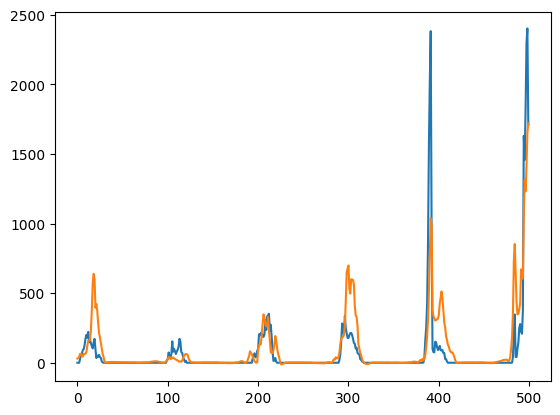

In [15]:
for feature, label in test_ds.take(1):
    prd = model(feature)
    print(label.shape)
    plt.plot(range(500), label)
    plt.plot(range(500), prd)
    plt.show()

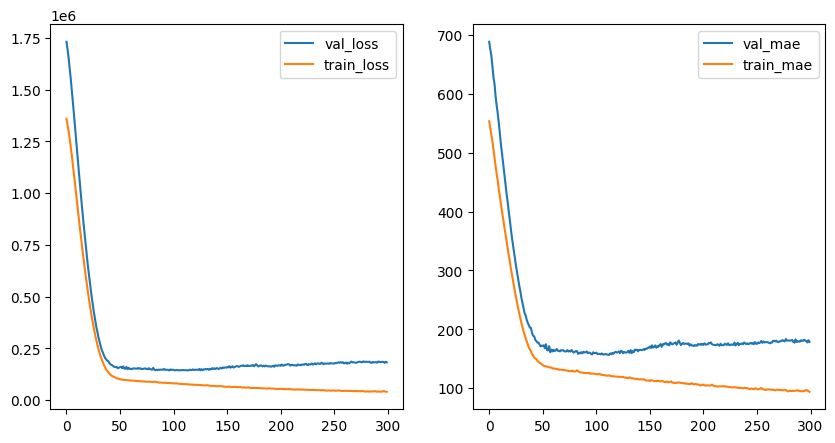

In [18]:
import matplotlib.pyplot as plt

# 손실 및 정확도 변화 그래프

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['mae']
val_acc = history.history['val_mae']

eps = range(len(val_loss))

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(eps, val_loss, label = 'val_loss')
ax1.plot(eps, loss, label = 'train_loss')
ax1.legend()

ax2 = fig.add_subplot(1,2,2)
ax2.plot(eps, val_acc, label = 'val_mae')
ax2.plot(eps, acc, label = 'train_mae')
ax2.legend()
plt.show()